<a href="https://colab.research.google.com/github/TAkkerboom/DL2_socratic_models_team_2/blob/main/Demos/Experiment3_Flamingo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flamingo as baseline#

To compare the results of the Socratic Model to other VQA models, we tested OpenFlamingo. The script of this model can be seen in [Github link](https://github.com/TAkkerboom/DL2_socratic_models_team_2/blob/main/OpenFlaming.py). Because this model cannot be loaded in Colab, we show an opensource implementation called Flamingo_mini. This Model cannot be loaded in Colab, because the LLama weights can only be downloaded with permision. We asked permision, but we are not allowed to share the weights. In total the weights of OpenFlamingo are also 17 GB, which is higher than the 15GB GPU Ram we have. The Flamingo_mini version we show here doesn't have VQA abilities, in contrast to OpenFlamingo. This notebook is therefore only to demonstrate how to load both the images of the puzzle and the prompt

In [ ]:
# Pull the git repository
!git clone 'https://github.com/TAkkerboom/DL2_socratic_models_team_2.git'
!git pull

Cloning into 'DL2_socratic_models_team_2'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 509 (delta 35), reused 12 (delta 1), pack-reused 443
Receiving objects: 100% (509/509), 1.33 MiB | 12.06 MiB/s, done.
Resolving deltas: 100% (283/283), done.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
! nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       518Mi       7.6Gi       2.0Mi       4.5Gi        11Gi
Swap:            0B          0B          0B


In [ ]:
! lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2200.140
BogoMIPS:                        4400.28
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
!pip install git+https://github.com/dhansmair/flamingo-mini.git#egg=flamingo_mini
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/dhansmair/flamingo-mini.git to /tmp/pip-install-jt8pysr7/flamingo-mini_51d7cc2a58424f389f94318b8eb79788
  Running command git clone --filter=blob:none --quiet https://github.com/dhansmair/flamingo-mini.git /tmp/pip-install-jt8pysr7/flamingo-mini_51d7cc2a58424f389f94318b8eb79788
  Resolved https://github.com/dhansmair/flamingo-mini.git to commit 8a8feaec47a36efb5b4834ebf1d56760656e31ed
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.9 MB/s eta 0:00:00
  Created wheel for flamingo_mini: filename=flamingo_mini-0.0.2-py3-none-any.whl size=22537 sha256=e642a4bda289e00faa0b2179b

In [ ]:
%cd /content/DL2_socratic_models_team_2/
!pwd

/content/DL2_socratic_models_team_2
/content/DL2_socratic_models_team_2


##Loading the model and the images##
First a subset of the Raven Progressive Matrices (RPM) images are loaded

In [ ]:
import torch
from flamingo_mini import FlamingoModel, FlamingoConfig, FlamingoProcessor
from flamingo_mini.utils import load_url
from einops import repeat
from DL2_socratic_models_team_2.src.dataset import Raven

# load the Raven Progressive matrices 
test_set = Raven('./center_single_subset', '', '')
test_set.load_data()

Loading item: 0
Loading item: 1
Loading item: 2
Loading item: 3
Loading item: 4
Loading item: 5
Loading item: 6
Loading item: 7
Loading item: 8
Loading item: 9
Loading item: 10
Loading item: 11
Loading item: 12
Loading item: 13
Loading item: 14
Loading item: 15
Loading item: 16
Loading item: 17
Loading item: 18
Loading item: 19
Loading item: 20
Loading item: 21
Loading item: 22
Loading item: 23
Loading item: 24
Loading item: 25
Loading item: 26
Loading item: 27
Loading item: 28
Loading item: 29
Loading item: 30
Loading item: 31
Loading item: 32
Loading item: 33
Loading item: 34
Loading item: 35
Loading item: 36
Loading item: 37
Loading item: 38
Loading item: 39
Loading item: 40
Loading item: 41
Loading item: 42
Loading item: 43
Loading item: 44
Loading item: 45
Loading item: 46


You can change the puzzlenumber with the variable PUZZLE_NUMBER. The puzzle is immediately displayed

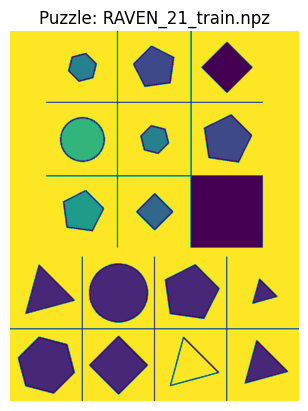

In [ ]:
# change the variable PUZZLE_NUMBER to see different puzzles
PUZZLE_NUMBER = 4
test_set.plot_puzzle(PUZZLE_NUMBER)

Flamingo Model works as follows. The vision encoder loads the images and outputs Tokens with the Perceiver Resampler. These Tokens are used to condition the Language Model in it's ouput. First a function is loaded from [Flamingo Mini](https://github.com/dhansmair/flamingo-mini/blob/main/examples/few_shot_prompt.ipynb). This function loads the images and the text prompt for the Flamingo Model. In the OpenFlamingo implementation we used for our project, this function is the equivalent to [inference_flamingo](https://github.com/TAkkerboom/DL2_socratic_models_team_2/blob/main/OpenFlaming.py)

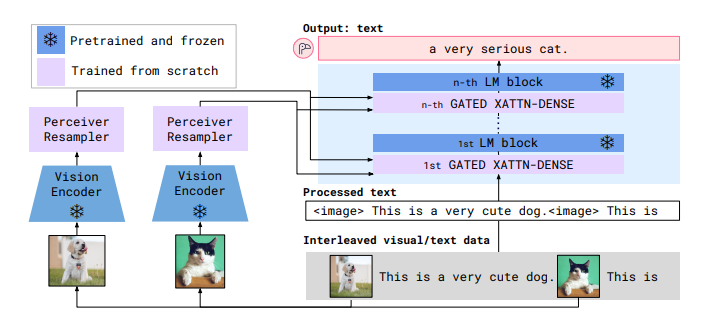

In [ ]:
def multimodal_prompt(model: FlamingoModel, processor: FlamingoProcessor, prompt: str, images: list, device: torch.device) -> str:
    """few-shot multimodal prompting 
    
    shape for visual_features parameter: [b=batch size, N=number of images, T=1 (number of frames), v=number of visual features, d=dimensionality of visual feature]
    (I haven't checked if it works with videos)
    """
    input_ids, media_locations, attention_mask = processor.encode_text(prompt, device=device)

    pixels = processor(images, device=device)['pixel_values']
    pixels = repeat(pixels, 'N c h w -> b N T c h w', b=1, T=1)
    
    output = model.generate(
        inputs=input_ids,
        media_locations=media_locations,
        attention_mask=attention_mask,
        pixel_values=pixels,
        max_length=200,
        use_cache=True,
        early_stopping=True,
        bos_token_id=model.flamingo.lm.config.bos_token_id,
        eos_token_id=model.flamingo.lm.config.eos_token_id,
        pad_token_id=model.flamingo.lm.config.eos_token_id
    )

    response = processor.tokenizer.batch_decode(output, skip_special_tokens=True)
    return response[0]


Then the weights of the Flamingo_mini model are loaded and send to the GPU.

In [ ]:
# beware that this model was not trained for few-show
model = FlamingoModel.from_pretrained('dhansmair/flamingo-tiny')
#model = load_model_from_checkpoint('flamingo-tiny-vitL', 34)
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()

processor = FlamingoProcessor(model.config)


This is the Prompt we used to condition the Language Model. The End Of Sentence (EOC) Token are to specify which text belongs to which image.

In [ ]:
prompt = '''You are given a logic puzzle from the RAVEN dataset. The puzzle looks like <image>.
        Based on this image, what is the third shape on the third row? You can only choose between the following shapes<EOC>:
        <image> Shape 1: <EOC>, <image>Shape 2: <EOC>,<image> Shape 3: <EOC>, <image>Shape 4: <EOC>,
        <image> Shape 5: <EOC>, <image>Shape 6: <EOC>, <image>Shape 7: <EOC>, <image>Shape 8: <EOC>. Answer is shape '''

The puzzle and the puzzle answers are stored in a list in PIL format for the Flamingo Model.

In [ ]:
from PIL import Image
puzzleanswers = test_set.get_puzzle(PUZZLE_NUMBER)[8:]
completepuzzle = Image.fromarray(test_set.items[PUZZLE_NUMBER].puzzle_image).convert("P")
puzzleanswers = [completepuzzle]+puzzleanswers
response = multimodal_prompt(model, processor, prompt, images=puzzleanswers, device="cuda" if torch.cuda.is_available() else "cpu")
print('prompt:', prompt)
print('output:', response)

prompt: You are given a logic puzzle from the RAVEN dataset. The puzzle looks like <image>.
        Based on this image, what is the third shape on the third row? You can only choose between the following shapes<EOC>:
        <image> Shape 1: <EOC>, <image>Shape 2: <EOC>,<image> Shape 3: <EOC>, <image>Shape 4: <EOC>,
        <image> Shape 5: <EOC>, <image>Shape 6: <EOC>, <image>Shape 7: <EOC>, <image>Shape 8: <EOC>. Answer is shape 
output: You are given a logic puzzle from the RAVEN dataset. The puzzle looks like <image>.
        Based on this image, what is the third shape on the third row? You can only choose between the following shapes<EOC>:
        <image> Shape 1: <EOC>, <image>Shape 2: <EOC>,<image> Shape 3: <EOC>, <image>Shape 4: <EOC>,
        <image> Shape 5: <EOC>, <image>Shape 6: <EOC>, <image>Shape 7: <EOC>, <image>Shape 8: <EOC>. Answer is shape <EOC>


Because Flamingo Mini version is not trained for VQA, like OpenFlamingo, the output prompt is not correct.

For puzzle 4, the [OpenFlamingo implementation](https://github.com/TAkkerboom/DL2_socratic_models_team_2/blob/main/OpenFlaming.py) in the Inference function gives the following prompt:

You are given a logic puzzle from the RAVEN dataset. The puzzle looks like <image> .
        Based on this image, what is the third shape on the third row? You can only choose between the following shapes:<|endofchunk|> 
        Shape 1: <image><|endofchunk|> , Shape 2: <image><|endofchunk|> , Shape 3: <image><|endofchunk|> , Shape 4: <image><|endofchunk|> ,
        Shape 5: <image><|endofchunk|> , Shape 6: <image><|endofchunk|> , Shape 7: <image><|endofchunk|> , Shape 8: <image><|endofchunk|> . The answer of the RAVEN puzzle logic puzzle is shape 8. The answer of the RAVEN puzzle logic puzzle is shape 8.

This is further processed to get the shape number in the [accuracy function](https://github.com/TAkkerboom/DL2_socratic_models_team_2/blob/main/OpenFlaming.py).

In [ ]:
AnswerOpenFlamingo = '''You are given a logic puzzle from the RAVEN dataset. The puzzle looks like <image> .
        Based on this image, what is the third shape on the third row? You can only choose between the following shapes:<|endofchunk|> 
        Shape 1: <image><|endofchunk|> , Shape 2: <image><|endofchunk|> , Shape 3: <image><|endofchunk|> , Shape 4: <image><|endofchunk|> ,
        Shape 5: <image><|endofchunk|> , Shape 6: <image><|endofchunk|> , Shape 7: <image><|endofchunk|> , Shape 8: <image><|endofchunk|> . The answer of the RAVEN puzzle logic puzzle is shape 8. The answer of the RAVEN puzzle logic puzzle is shape 8.'''

In [ ]:
predictionnum = AnswerOpenFlamingo.split("The answer of the RAVEN puzzle logic puzzle is shape")[1][:4]

In [ ]:
Puzzlename = int(''.join(filter(str.isdigit, predictionnum)))-1

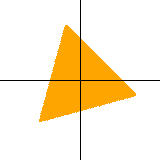

In [ ]:
 puzzleshape = test_set.get_puzzle(PUZZLE_NUMBER)[8:][Puzzlename]
 puzzleshape.show()